***Подключаем библиотеки***

In [283]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

***Подключаем датасет Iris.csv***

In [284]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')
iris.drop(iris[iris['Species'] == "Iris-versicolor"].index, inplace=True)

***Создадём тренировочные и проверочные значения***

In [285]:
X = iris.iloc[:, 1:5].values
y = iris.iloc[:, 5].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

***Для улучшение результата, маштабируем объект***

In [286]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

***Отображаем тренировочную выборку***

Text(0.5, 0.98, 'X_Train матрица рассеяния')

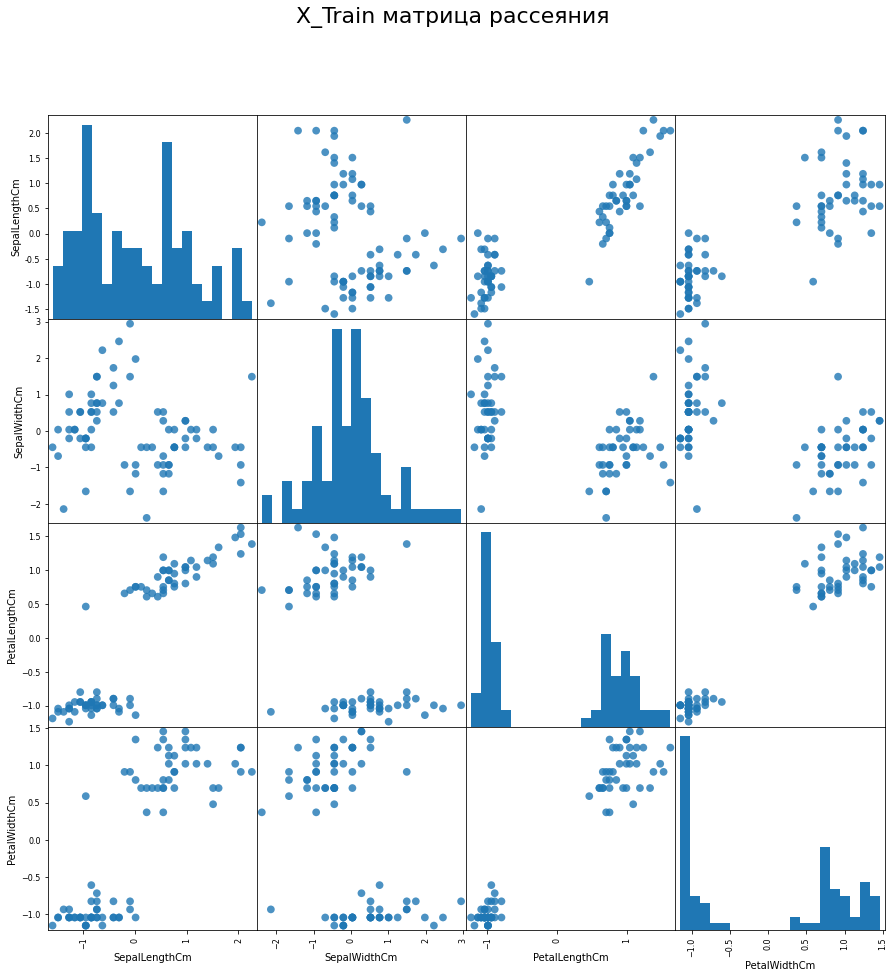

In [287]:
grr=pd.plotting.scatter_matrix(pd.DataFrame(X_train, columns = dataset.columns[1:5]),figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Train матрица рассеяния', fontsize=22)

***Отображаем тестовую выборку***

Text(0.5, 0.98, 'X_Test матрица рассеяния')

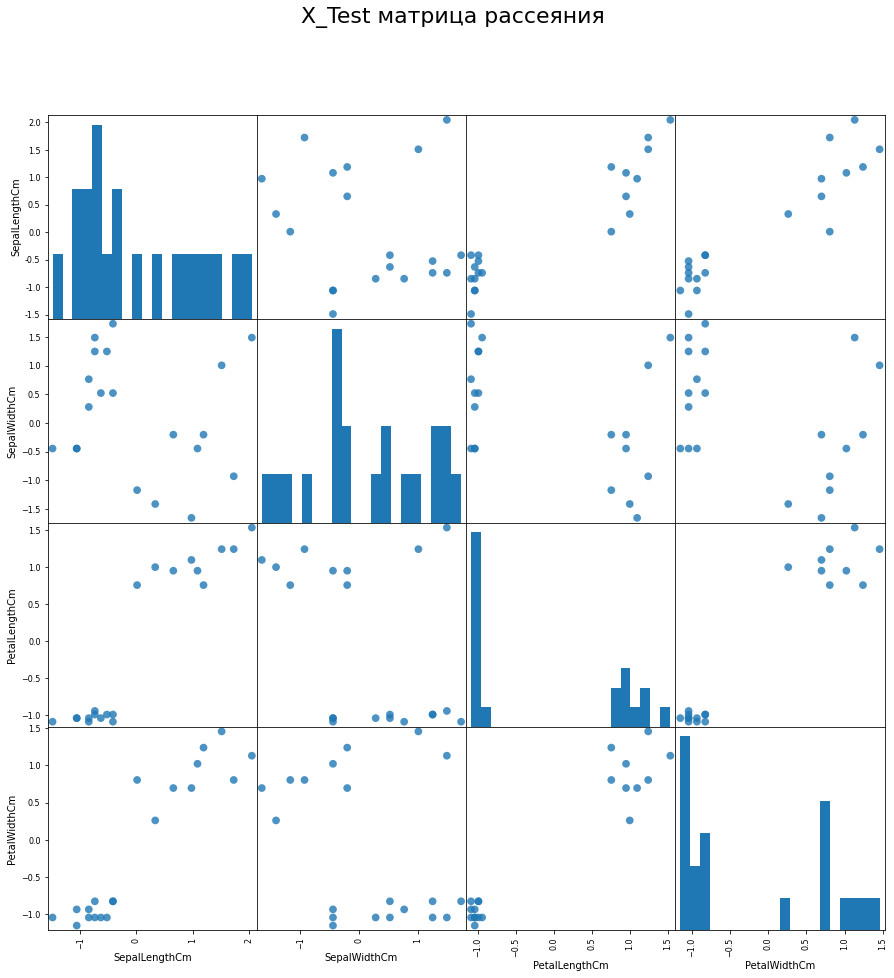

In [288]:
grr=pd.plotting.scatter_matrix(pd.DataFrame(X_test, columns=dataset.columns[1:5]),figsize=(15,15),marker="o",hist_kwds={'bins':20},s=60,alpha=.8)
plt.suptitle('X_Test матрица рассеяния', fontsize=22)

***Реализуем модель k ближайших соседей***

In [289]:
model_neighbours = KNeighborsClassifier()
model_neighbours.fit(X_train, y_train)

KNeighborsClassifier()

***Генерирум отчёт с матрицой ошибок первого и второго рода***

                precision    recall  f1-score   support

   Iris-setosa       1.00      1.00      1.00        11
Iris-virginica       1.00      1.00      1.00         9

      accuracy                           1.00        20
     macro avg       1.00      1.00      1.00        20
  weighted avg       1.00      1.00      1.00        20



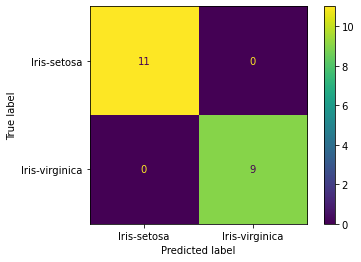

In [290]:
y_pred = model_neighbours.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_neighbours.classes_).plot()
print(classification_report(y_test, y_pred))

***Чувствительность и специфичность***

In [291]:
sensitivity = confm[0,0]/(confm[0,0] + confm[0,1])
print('Чуствительность = ', sensitivity)
specificity = confm[1,1]/(confm[1,0] + confm[1,1])
print('Спицефичность  = ', specificity)

Чуствительность =  1.0
Спицефичность  =  1.0
